In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from keras import backend as K
import cv2
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.optimizers import SGD
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
train_dir="./sign_data/sign_data/train"
train_csv="./sign_data/sign_data/train_data.csv"
test_csv="./sign_data/sign_data/test_data.csv"
test_dir="./sign_data/sign_data/test"

In [14]:
df_train=pd.read_csv(train_csv)
df_train.sample(10)

,068/09_068.png,068_forg/03_0113068.PNG,1
2574,004/004_05.PNG,004/004_01.PNG,0
20130,063/09_063.png,063_forg/02_0104063.PNG,1
7548,065/11_065.png,065/10_065.png,0
2412,004/004_20.PNG,004_forg/0105004_04.png,1
2763,004/004_01.PNG,004/004_14.PNG,0
12756,049/09_049.png,049/12_049.png,0
17750,013/07_013.png,013/06_013.png,0
18849,015/015_10.PNG,015/015_13.PNG,0
5847,022/06_022.png,022_forg/03_0214022.PNG,1
9587,006/006_04.PNG,006/006_05.PNG,0


In [15]:
def dataset_train(train_csvfile):
    x1=[]
    x2=[]
    y_train=[]
    for i in range(0,2000):
        image1_path=os.path.join(train_dir,train_csvfile.iat[i,0])
        image2_path=os.path.join(train_dir,train_csvfile.iat[i,1])
        img1=cv2.imread(image1_path)
        img1= cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        img1=cv2.resize(img1,(150,150))
        x1.append(img1)
        img2=cv2.imread(image2_path)
        img2= cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
        img2=cv2.resize(img2,(150,150))
        x2.append(img2)
        y_train.append(train_csvfile.iat[i,2])
#         print(i)
#         l.append([img1,img2,train_csvfile.iat[i,2]])
    x1=np.array(x1).astype(np.float32)/255.0
    x2=np.array(x2).astype(np.float32)/255.0
    y_train=np.array(y_train).astype(np.float32)
    
    return x1,x2,y_train

In [16]:
def dataset_test(test_csvfile):
    x1=[]
    x2=[]
    y_train=[]
    for i in range(2000,4000):
        image1_path=os.path.join(test_dir,test_csvfile.iat[i,0])
        image2_path=os.path.join(test_dir,test_csvfile.iat[i,1])
        img1=cv2.imread(image1_path)
        img1= cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        img1=cv2.resize(img1,(150,150))
        x1.append(img1)
        img2=cv2.imread(image2_path)
        img2= cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
        img2=cv2.resize(img2,(150,150))
        x2.append(img2)
        y_train.append(test_csvfile.iat[i,2])
#         print(i)
#         l.append([img1,img2,train_csvfile.iat[i,2]])
    x1=np.array(x1).astype(np.float32)/255.0
    x2=np.array(x2).astype(np.float32)/255.0
    y_train=np.array(y_train).astype(np.float32)
    
    return x1,x2,y_train

In [17]:
df_test=pd.read_csv(test_csv)

In [18]:
xt1,xt2,yt=dataset_test(df_test)

In [19]:
xs1,xs2,ys=dataset_train(df_train)

In [20]:

def dist1(xy):
    x, y = xy
    sum_abs = K.sum(K.abs(x - y), axis=1, keepdims=True)
#     return sum_abs
    return K.maximum(sum_abs, K.epsilon())
def dist2(xy):
    x,y=xy
    sum_square=K.sum(K.square(x-y),axis=1,keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

def dist3(xy):
    x,y=xy
    return K.sqrt(K.mean(K.square(x-y),axis=1,keepdims=True))
def dist4(xy):
    x,y=xy
    ss=K.sum(K.square(x-y),axis=1,keepdims=True)
    return K.sqrt(ss)/x.shape[1]


input1=keras.layers.Input(shape=(150,150,1))
# x=keras.layers.Flatten()(input1)
x=keras.layers.Conv2D(64,(10,10),activation='relu')(input1)
x=keras.layers.MaxPooling2D(2,2)(x)
# x=BatchNormalization()(x)
x=keras.layers.Dropout(0.5)(x)
# x=keras.layers.Conv2D(128,(7,7),activation='relu')(x)
# x=keras.layers.MaxPooling2D(2,2)(x)
x=keras.layers.Conv2D(100,(7,7),activation='relu')(x)
# x=BatchNormalization()(x)
x=keras.layers.MaxPooling2D(2,2)(x)
x=keras.layers.Dropout(0.5)(x)
# x=keras.layers.Conv2D(258,(4,4),activation='relu')(x)
# x=keras.layers.MaxPooling2D(2,2)(x)
x=keras.layers.Flatten()(x)
# x=keras.layers.Dense(4096,activation='relu')(x)
x=keras.layers.Dense(500,activation='relu')(x)
# x=BatchNormalization()(x)
dense=keras.models.Model(inputs=input1,outputs=x)


img1=keras.layers.Input(shape=(150,150,1))
img2=keras.layers.Input(shape=(150,150,1))
dense1=dense(img1)
dense2=dense(img2)
fc=keras.layers.Lambda(dist3)([dense1,dense2])
# fc=keras.layers.Dense(100,activation='relu')(fc)
fc=keras.layers.Dense(1,activation='sigmoid')(fc)

m=keras.models.Model(inputs=[img1,img2],outputs=fc)

m.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
m.summary()

    

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 150, 150, 1  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 500)          51520664    ['input_2[0][0]',                
                                                                  'input_3[0][0]']          

In [21]:
m.fit([xs1,xs2],ys,epochs=10)

Epoch 1/10
63/63 [==============================] - 132s 2s/step - loss: nan - accuracy: 0.4705
Epoch 2/10
63/63 [==============================] - 134s 2s/step - loss: nan - accuracy: 0.4620
Epoch 3/10
63/63 [==============================] - 131s 2s/step - loss: nan - accuracy: 0.4620
Epoch 4/10
63/63 [==============================] - 132s 2s/step - loss: nan - accuracy: 0.4620
Epoch 5/10
63/63 [==============================] - 131s 2s/step - loss: nan - accuracy: 0.4620
Epoch 6/10
63/63 [==============================] - 132s 2s/step - loss: nan - accuracy: 0.4620
Epoch 7/10
63/63 [==============================] - 133s 2s/step - loss: nan - accuracy: 0.4620
Epoch 8/10
63/63 [==============================] - 133s 2s/step - loss: nan - accuracy: 0.4620
Epoch 9/10
63/63 [==============================] - 133s 2s/step - loss: nan - accuracy: 0.4620
Epoch 10/10
63/63 [==============================] - 129s 2s/step - loss: nan - accuracy: 0.4620


In [22]:
m.evaluate([xt1,xt2],yt)

63/63 [==============================] - 28s 442ms/step - loss: nan - accuracy: 0.4275


[nan, 0.42750000953674316]

In [23]:
def check(stored,image):
    img2=np.array([image])
    for i in range(0,stored.shape[0]):
        img1=np.array([stored[i]])
        pred=m.predict([img1,img2])
        print(pred)
        if(pred<0.5):
            print("matched",i)
            return
    print("unmatched")
    

In [24]:
database_signatures=xt1[:15]

In [25]:
check(database_signatures,xt1[13])

1/1 [==============================] - 0s 122ms/step
[[nan]]
1/1 [==============================] - 0s 39ms/step
[[nan]]
1/1 [==============================] - 0s 38ms/step
[[nan]]
1/1 [==============================] - 0s 38ms/step
[[nan]]
1/1 [==============================] - 0s 37ms/step
[[nan]]
1/1 [==============================] - 0s 38ms/step
[[nan]]
1/1 [==============================] - 0s 39ms/step
[[nan]]
1/1 [==============================] - 0s 38ms/step
[[nan]]
1/1 [==============================] - 0s 39ms/step
[[nan]]
1/1 [==============================] - 0s 38ms/step
[[nan]]
1/1 [==============================] - 0s 38ms/step
[[nan]]
1/1 [==============================] - 0s 37ms/step
[[nan]]
1/1 [==============================] - 0s 38ms/step
[[nan]]
1/1 [==============================] - 0s 38ms/step
[[nan]]
1/1 [==============================] - 0s 40ms/step
[[nan]]
unmatched


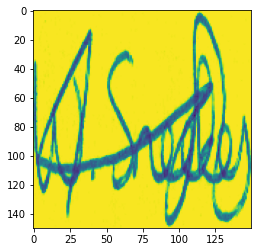

In [26]:
plt.imshow(xs1[223])

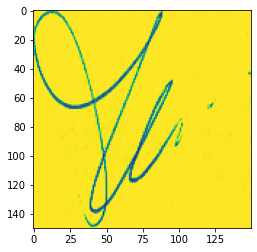

In [27]:
plt.imshow(xt1[223])